### Name:- Aditya Raj

### Business Objective
## An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
## You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
## Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation.
## Hence be very careful while providing campaign recommendation


## Variable Description

#### Variable-	Description
### AccountID -	account unique identifier
### Churn -	account churn flag (Target)
### Tenure	-Tenure of account
### City_Tier -	Tier of primary customer's city
### CC_Contacted_L1 2m --How many times all the customers of the account has contacted customer care in last 12months
	

### Payment -	Preferred Payment mode of the customers in the account
### Gender -	Gender of the primary customer of the account

### Service_Score	-Satisfaction score given by customers of the account on service provided by company

### Account_user_count	- Number of customers tagged with this account


### account_segment -	Account segmentation on the basis of spend

### CC_Agent_Score -	Satisfaction score given by customers of the account on customer care service provided by company

### Marital_Status	- Marital status of the primary customer of the account
### rev_per_month-	Monthly average revenue generated by account in last 12 months
### Complain_l12m-	 Any complaints has been raised by account in last 12 months

### rev_growth_yoy-	  revenue growth percentage of the account (last 12 months vs last 24 to 13month)

### coupon_used_l12m-	How many times customers have used coupons to do the payment in last 12months


### Day_Since_CC_connect	- Number of days since no customers in the account has contacted the customer care


### cashback_l12m -  Monthly average cashback generated by account in last 12 months
### Login_device	-  Preferred login device of the customers in the account



## importing all necessray library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## loading the dataset

In [2]:
df=pd.read_excel('Customer Churn Data1.xlsx',sheet_name='raj')

In [3]:
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer


In [4]:
df.shape

(11260, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
## float(5)-City_Tier , CC_Contacted_LY ,Service_Score ,CC_Agent_Score,Complain_ly 
## int(2)-AccountID ,Churn   
## object(12)-Tenure    , Payment , Gender ,Account_user_count  ,account_segment, Marital_Status ,rev_per_month,rev_growth_yoy  ,
## coupon_used_for_payment, Day_Since_CC_connect,  cashback, Login_device         

## summary of dataset

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Check for missing value in any column

In [7]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [8]:
numerical_features = ['AccountID', 'Churn', 'City_Tier','CC_Contacted_LY','Service_Score','CC_Agent_Score','Complain_ly']

# Impute null values with the median
for feature in numerical_features:
    median = df[feature].median()
    df[feature].fillna(median, inplace=True)

In [9]:
categorical_features = ['Tenure', 'Payment', 'Gender','Account_user_count','account_segment','Marital_Status','rev_per_month','rev_growth_yoy',
                       'coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']

# Impute null values with the mode
for feature in categorical_features:
    mode = df[feature].mode().values[0]
    df[feature].fillna(mode, inplace=True)

In [10]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1453
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6436
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4681
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [12]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## data visualization

In [13]:
df["Churn"][df["Churn"]==0].groupby(by=df["Gender"]).count()


Gender
F          232
Female    3527
M          298
Male      5307
Name: Churn, dtype: int64

In [14]:
df['Gender'].value_counts(normalize=True)*100

Male      57.158082
Female    37.104796
M          3.339254
F          2.397869
Name: Gender, dtype: float64

In [15]:
df['Churn'].value_counts(normalize=True)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [16]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,155.62,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


C:\Users\DELL\AppData\Local\Temp\ipykernel_12812\4063367022.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)


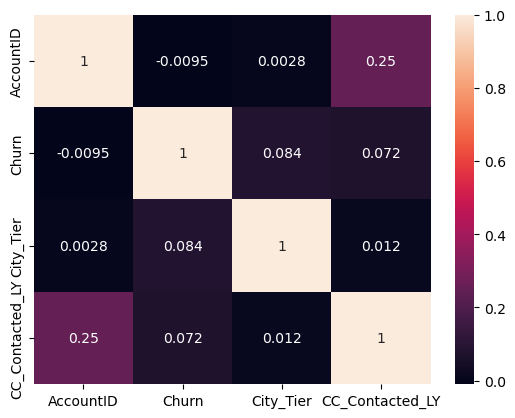

In [17]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

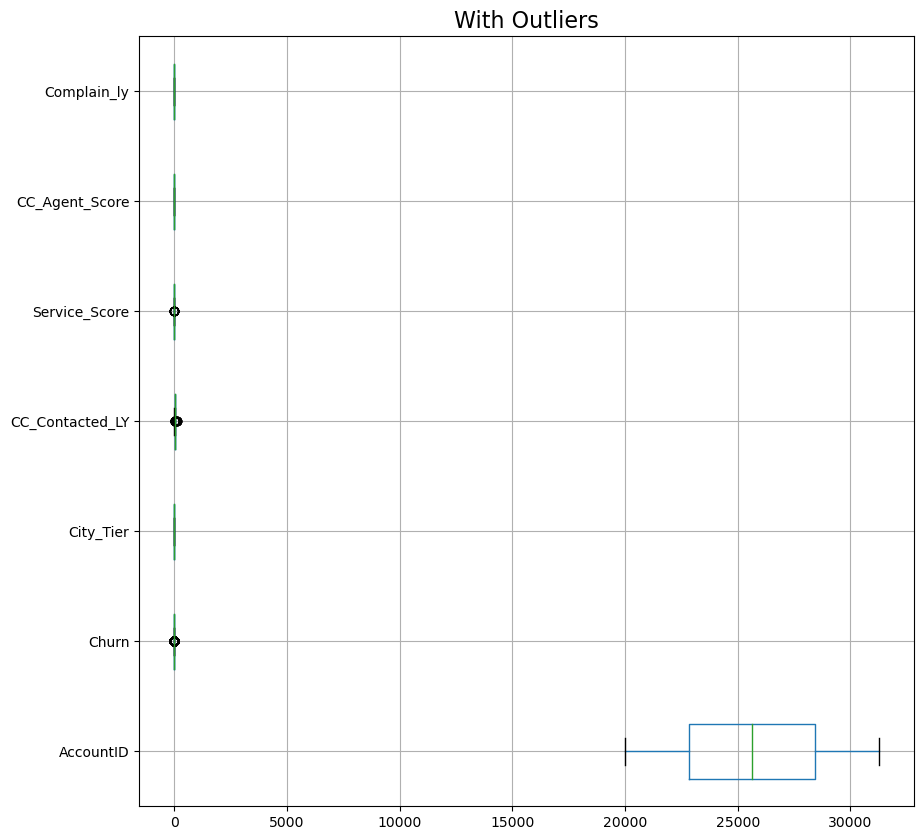

In [18]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [63]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

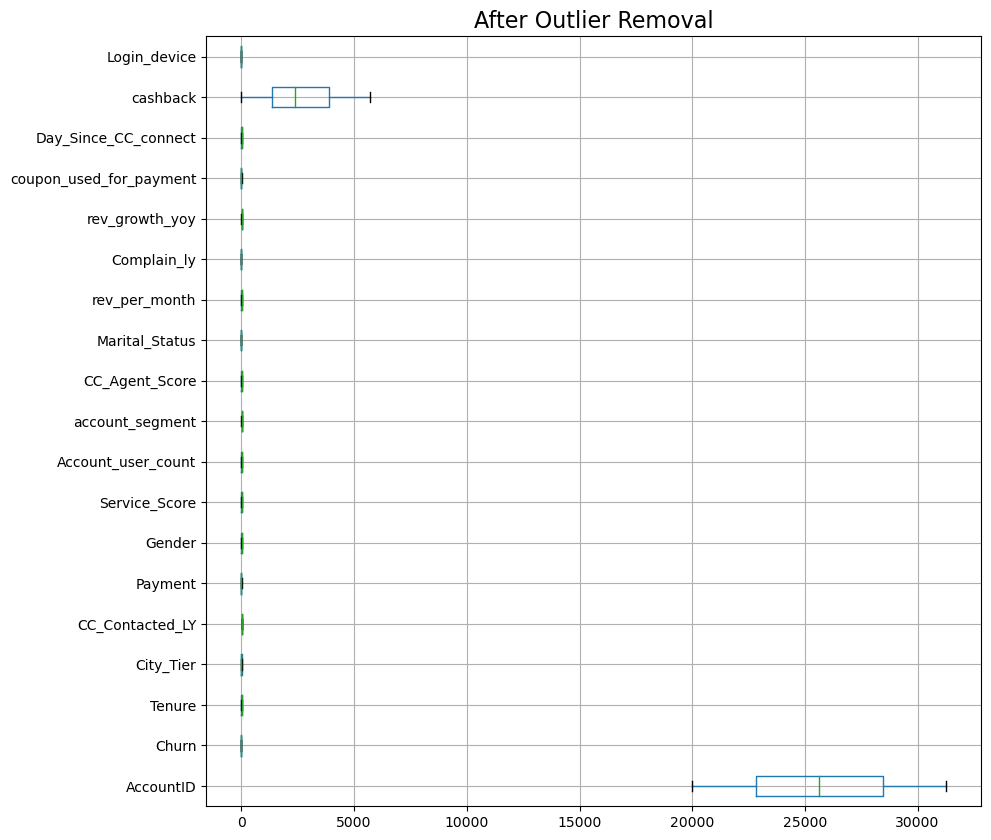

In [64]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### data distribution

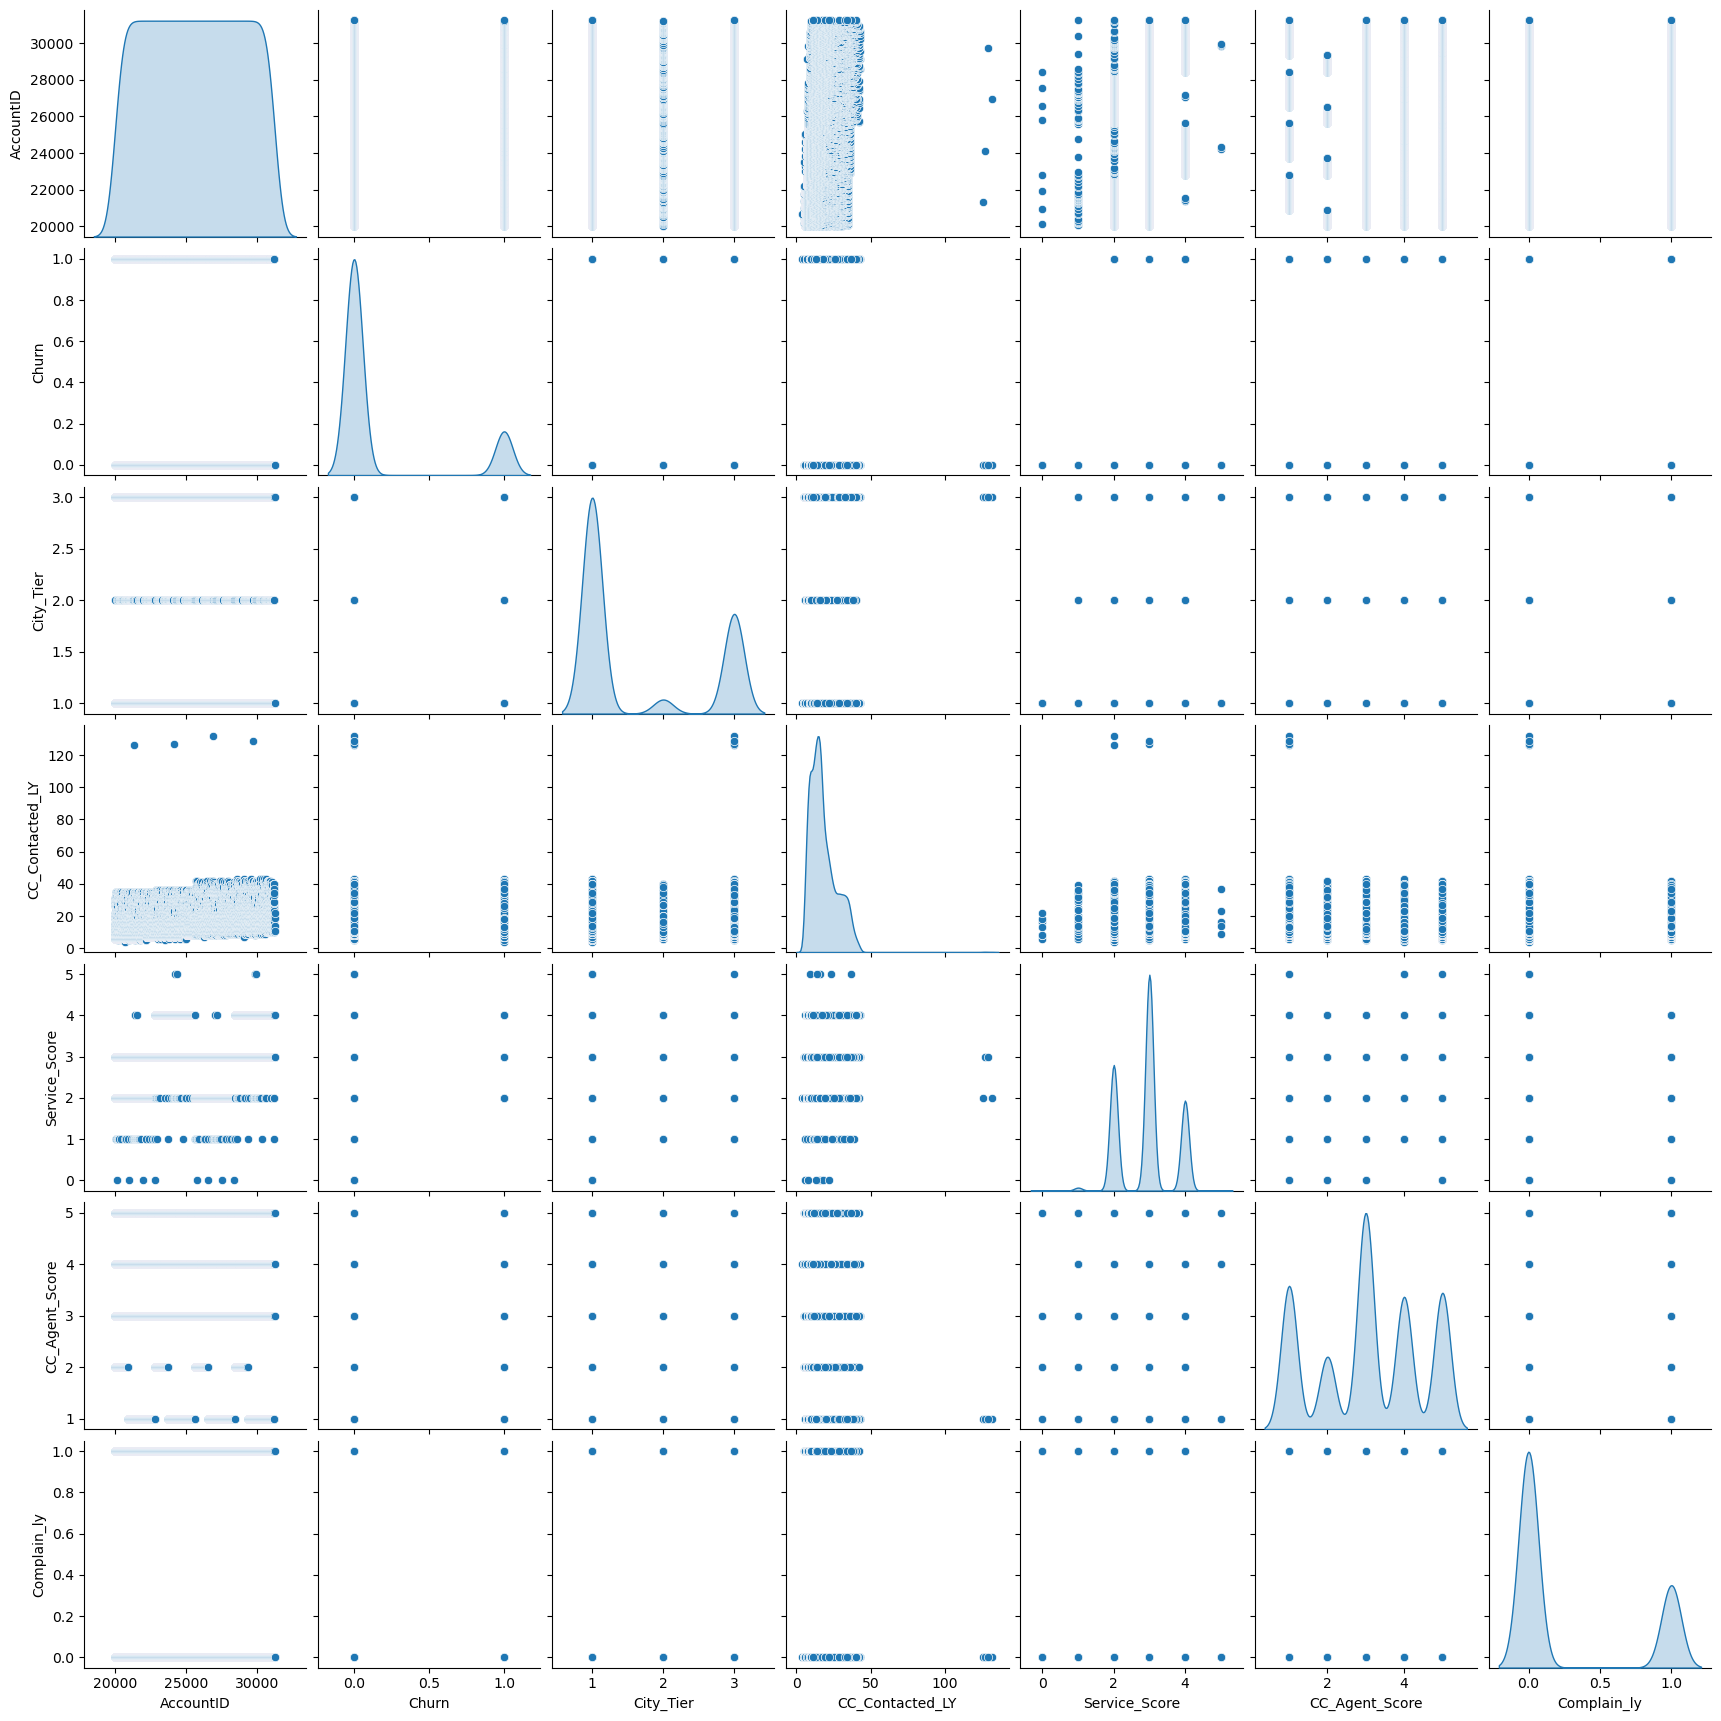

In [22]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

In [23]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


## CONVERTING CATEGORICAL TO NUMERICAL

In [24]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Tenure
[4, 0, 2, 13, 11, ..., 50, 60, 31, 51, 61]
Length: 38
Categories (38, object): [0, 1, 2, 3, ..., 60, 61, 99, '#']
[ 4  0  2 13 11 37  9 36 19 20 14  8 26 18  5 30  7  1 23  3 29  6 28 24
 25 16 10 15 22 27 12 21 17 32 34 31 33 35]


feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male', 'F', 'M']
Categories (4, object): ['F', 'Female', 'M', 'Male']
[1 3 0 2]


feature: Account_user_count
[3, 4, 5, 2, '@', 1, 6]
Categories (7, object): [1, 2, 3, 4, 5, 6, '@']
[2 3 4 1 6 0 5]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', 'Super Plus', 'Super +']
Categories (7, object): ['HNI', 'Regular', 'Regular +', 'Regular Plus', 'Super', 'Super +', 'Super Plus']
[4 3 1 0 2 6 5]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'M

In [25]:
df


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,2,1,3.0,2,4,2.0,2,8,1.0,1,1,5,2222,2
1,20001,1,0,1.0,8.0,4,3,3.0,3,3,3.0,2,6,1.0,5,0,0,109,2
2,20002,1,0,1.0,30.0,2,3,2.0,3,3,3.0,2,5,1.0,4,0,3,1949,2
3,20003,1,0,3.0,15.0,2,3,2.0,3,4,5.0,2,7,0.0,13,0,3,748,2
4,20004,1,0,1.0,12.0,1,3,2.0,2,3,5.0,2,2,0.0,1,1,3,552,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,1,3,3.0,1,4,1.0,1,8,0.0,9,1,4,1810,1
11256,31256,0,13,1.0,19.0,1,3,3.0,4,0,5.0,1,6,0.0,6,1,8,4481,2
11257,31257,0,1,1.0,14.0,2,3,3.0,1,4,4.0,1,6,1.0,12,1,4,3680,2
11258,31258,0,23,3.0,11.0,1,3,4.0,4,4,4.0,1,6,0.0,6,2,9,3244,1


In [26]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [27]:
X = df.drop(["Churn"], axis=1)

Y= df["Churn"]
X.shape,Y.shape

((11260, 18), (11260,))

## splitting the data into training and test data

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (7882, 18)
X_test (3378, 18)
Y_train (7882,)
Y_test (3378,)


## 
## Building a Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix


In [32]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [250],
    'min_samples_split': [750]
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [33]:
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=750)

In [35]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [36]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.957792,0.042208
1,0.870112,0.129888
2,0.437173,0.562827
3,0.957792,0.042208
4,0.897106,0.102894


## Model Evaluation
## Confusion Matrix for the training data

In [37]:
confusion_matrix(Y_train, ytrain_predict)

array([[6189,  352],
       [ 643,  698]], dtype=int64)

In [71]:
churn_train_acc=best_grid.score(X_train,Y_train) 
churn_train_acc

0.9025628013194621

In [39]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6541
           1       0.66      0.52      0.58      1341

    accuracy                           0.87      7882
   macro avg       0.79      0.73      0.75      7882
weighted avg       0.86      0.87      0.87      7882



## confusion matrix

In [40]:
confusion_matrix(Y_test, ytest_predict)

array([[2684,  139],
       [ 250,  305]], dtype=int64)

In [68]:
#Test Data Accuracy
churn_test_acc=best_grid.score(X_test,Y_test)
churn_test_acc

0.9040852575488455

In [42]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2823
           1       0.69      0.55      0.61       555

    accuracy                           0.88      3378
   macro avg       0.80      0.75      0.77      3378
weighted avg       0.88      0.88      0.88      3378



In [73]:
churn_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(churn_metrics).transpose()
churn_test_precision=round(df.loc["1"][0],2)
churn_test_recall=round(df.loc["1"][1],2)
churn_test_f1=round(df.loc["1"][2],2)
print ('churn_train_precision ',churn_test_precision)
print ('churn_train_recall ',churn_test_recall)
print ('churn_train_f1 ',churn_test_f1)

churn_train_precision  0.79
churn_train_recall  0.56
churn_train_f1  0.66


## Building a Random Forest Classifier
## Grid Search for finding out the optimal values for the hyper parameters

In [43]:
param_grid = {
    'max_depth': [8,9],
    'max_features': [8,9],
    'min_samples_leaf': [250,150],
    'min_samples_split': [750,500],
    'n_estimators': [100,150]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [44]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9], 'max_features': [8, 9],
                         'min_samples_leaf': [250, 150],
                         'min_samples_split': [750, 500],
                         'n_estimators': [100, 150]})

In [45]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': 8,
 'min_samples_leaf': 150,
 'min_samples_split': 500,
 'n_estimators': 100}

In [46]:
best_grid = grid_search.best_estimator_

In [47]:
best_grid

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=150,
                       min_samples_split=500)

## Predicting the Training and Testing data

In [48]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [49]:
confusion_matrix(Y_train,ytrain_predict)

array([[6325,  216],
       [ 793,  548]], dtype=int64)

In [50]:
rf_train_acc=best_grid.score(X_train,Y_train) 
rf_train_acc

0.8719868053793454

In [51]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6541
           1       0.72      0.41      0.52      1341

    accuracy                           0.87      7882
   macro avg       0.80      0.69      0.72      7882
weighted avg       0.86      0.87      0.86      7882



In [86]:
rf_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.82
rf_train_recall  0.55
rf_train_f1  0.66


## RF Model Performance Evaluation on Test data

In [52]:
rf_test_acc=best_grid.score(X_test,Y_test)
rf_test_acc

0.8851391355831854

In [53]:
print(classification_report(Y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2823
           1       0.75      0.45      0.56       555

    accuracy                           0.89      3378
   macro avg       0.83      0.71      0.75      3378
weighted avg       0.88      0.89      0.87      3378



In [77]:
rf_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.79
rf_test_recall  0.56
rf_test_f1  0.66


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [55]:
param_grid = {
    'hidden_layer_sizes': [64,128],
    'max_iter': [100,200,300],
    'solver': ['adam','sgd'], 
}

nncl = MLPClassifier(tol = 0.01)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [56]:
grid_search.fit(X_train_scaled, Y_train)
grid_search.best_params_

{'hidden_layer_sizes': 128, 'max_iter': 100, 'solver': 'adam'}

In [57]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=128, max_iter=100, tol=0.01)

In [58]:
ytrain_predict = best_grid.predict(X_train_scaled)
ytest_predict = best_grid.predict(X_test_scaled)

In [59]:
confusion_matrix(Y_train,ytrain_predict)

array([[6380,  161],
       [ 607,  734]], dtype=int64)

In [60]:
nn_train_acc=best_grid.score(X_train_scaled,Y_train) 
nn_train_acc

0.9025628013194621

In [61]:
print(classification_report(Y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6541
           1       0.82      0.55      0.66      1341

    accuracy                           0.90      7882
   macro avg       0.87      0.76      0.80      7882
weighted avg       0.90      0.90      0.89      7882



In [76]:
nn_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.82
nn_train_recall  0.55
nn_train_f1  0.66


## test

In [84]:
nn_test_acc=best_grid.score(X_test_scaled,Y_test)
nn_test_acc

0.9040852575488455

In [82]:
nn_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.79
nn_test_recall  0.56
nn_test_f1  0.66


In [62]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=128, max_iter=100, tol=0.01)>

### conclusion

In [85]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Churn Train':[churn_train_acc,churn_train_acc,churn_test_recall,churn_test_precision,churn_test_f1],
        'Churn Test':[churn_test_acc,churn_test_acc,churn_test_recall,churn_test_precision,churn_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_acc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_acc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_acc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_acc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,Churn Train,Churn Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.90,0.90,0.87,0.89,0.90,0.90
AUC,0.90,0.90,0.87,0.89,0.90,0.90
Recall,0.56,0.56,0.55,0.56,0.55,0.56
Precision,0.79,0.79,0.82,0.79,0.82,0.79
F1 Score,0.66,0.66,0.66,0.66,0.66,0.66
